$$\frac{\partial \Psi}{\partial \tau}=\frac{1}{2}\left [ \frac{1}{r}\frac{\partial \Psi}{\partial r}+
\frac{\partial^2 \Psi}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2 \Psi}{\partial \theta^2} \right ]$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import random as rd

from matplotlib import cm

# Parameter

In [2]:
NT = 36500

In [3]:
# jari jari
R = 1

# jumlah grid jari-jari
NR = 50

# panjang grid jari-jari
dr = R/NR

In [4]:
# interval waktu
dt = 0.01*dr*dr

In [5]:
# jumlah grid sudut
NA = 50
da = 2.0*np.pi/NA

In [6]:
# konstanta-konstanta
dtdr = 0.5*dt/(2*dr)
dtdr2 = 0.5*dt/(dr*dr)
dtda2 = 0.5*dt/(da*da)

In [7]:
k1 = 0
k2 = NA//4
k3 = 2*k2
k4 = 3*k2

In [8]:
# tempat menyimpan nilai

psi = np.zeros([NR+1, NA+1])
psinew = np.zeros([NR+1, NA+1])

r = np.arange(NR+1)*dr

In [9]:
# nilai psi awal
np.random.seed(2)

for i in range(1, NR):
    for j in range(NA):
        psi[i, j] = np.random.random()
        
psic = np.random.random()
for j in range(NA):
    psi[0, j] = psic

# Numerik

In [10]:
for n in range(1, NT):
    
    # update psi
    for i in range(1, NR):
        for j in range(NA):
            psinew[i, j] =  psi[i, j]
            psinew[i, j] += dtdr2*(psi[i-1, j] - 2*psi[i, j] + psi[i+1, j])
            psinew[i, j] += dtdr *(psi[i+1, j] - psi[i-1, j])/r[i]
            psinew[i, j] += dtda2*(psi[i, j-1] - 2*psi[i, j] + psi[i, j+1])/(r[i]*r[i])
            
    # index j = 0
    for i in range(1, NR):
        psinew[i, 0] = psi[i, 0]
        psinew[i, 0] += dtdr2*(psi[i-1, 0] - 2*psi[i, 0] + psi[i+1, 0])
        psinew[i, 0] += dtdr *(psi[i+1, 0] - psi[i-1, 0])/r[i]
        psinew[i, 0] += dtda2*(psi[i, NA-1] - 2*psi[i, 0] + psi[i, 1])/(r[i]*r[i])
        
    # at center i = 0
    psicnew = psic
    psicnew += dtdr2*(psi[1, k1] - 2*psic + psi[1, k3])
    psicnew += dtdr2*(psi[1, k2] - 2*psic + psi[1, k4])
    for j in range(NA+1):
        psinew[0, j] = psicnew
        
    # periodic boundary psi[i, 0] = psi[i, NR]
    for i in range(NR):
        psinew[i, NA] = psinew[i, 0]
    
    # save next iteration
    for i in range(NR):
        for j in range(NA+1):
            psi[i, j] = psinew[i, j]
            
    psic = psicnew
    
    # Menghitung energi
    pembilang = 0.0
    penyebut = 0.0

    for i in range(1, NR):
        for j in range(1, NA):
            pembilang += psi[i,j]*psi[i,j]

            d2psi =  -0.5*(psi[i+1, j] - psi[i-1, j])/(r[i]*2*dr)
            d2psi += -0.5*(psi[i-1, j] - 2*psi[i, j] + psi[i+1, j])/(dr*dr)
            d2psi += -0.5*(psi[i, j-1] - 2*psi[i, j] + psi[i, j+1])/(da*da*r[i]*r[i])

            penyebut += psi[i,j]*d2psi

    penyebut *= dr*da
    pembilang *= dr*da

    energi = penyebut/pembilang
    print(n, " ", energi)

1073.3752712667797
953.2986626685121
877.6319509257963
823.6008427297218
779.9661653215891
743.4849541046162
711.7497406170403
683.478285942235
657.823342833123
634.2363494762704
612.3361116478725
591.8500196899058
572.5756555221722
554.3584953317891
537.0775326580111
520.6359455874833
504.9547713070098
489.96851833245773
475.6220430633329
461.8682810903763
448.66656888522226
435.9813825302981
423.78137639345255
412.0386410666158
400.7281238678234
389.82717140490706
379.3151648434127
369.1732263240403
359.38398051964424
349.93135931471016
340.80044049964783
331.97731351488096
323.4489668731034
315.203193083536
307.2285078068356
299.5140806590886
292.04967561362207
284.8255993596963
277.8326562969671
271.0621090955266
264.5056439494791
258.15533980943724
252.003641005159
246.04333277070867
240.26751926633264
234.66960375768974
229.2432706673979
223.98246925841732
218.88139874560048
213.93449466214844
209.1364163331038
204.48203532917543
199.96642479191837
195.58484953628147
191.33275684

12.465962782786661
12.438595472161744
12.41137465958794
12.38429918379697
12.35736789535372
12.330579656510675
12.303933341063676
12.277427834210075
12.251062032408848
12.224834843242842
12.19874518528302
12.172791987954332
12.14697419140437
12.121290746372427
12.095740614062123
12.070322766014675
12.045036183984495
12.019879859816234
11.994852795323942
11.969954002171503
11.945182501755433
11.920537325088286
11.896017512684791
11.871622114448932
11.847350189562853
11.823200806376958
11.799173042302172
11.775265983703127
11.751478725793229
11.7278103725307
11.704260036516725
11.68082683889424
11.657509909248859
11.634308385510472
11.611221413856734
11.588248148617659
11.565387752181191
11.542639394900823
11.520002255003686
11.497475518500282
11.475058379095467
11.4527500381004
11.430549704345916
11.40845659409687
11.386469930967653
11.364588945839149
11.342812876776133
11.321140968946615
11.299572474541392
11.278106652695358
11.256742769409566
11.235480097474252
11.214317916392803
11.1

6.810991710986698
6.805354730634488
6.799730780314794
6.794119813898605
6.788521785481556
6.782936649382192
6.7773643601409095
6.771804872518299
6.766258141494001
6.760724122265285
6.755202770245588
6.749694041063417
6.744197890560781
6.738714274792113
6.733243150022793
6.727784472727899
6.722338199590981
6.716904287502693
6.711482693559644
6.706073375063009
6.70067628951751
6.695291394629816
6.6899186483076525
6.684558008658486
6.679209433988136
6.673872882799843
6.668548313792956
6.663235685861666
6.6579349580939615
6.652646089770439
6.647369040363059
6.642103769534047
6.636850237134797
6.631608403204785
6.626378227970171
6.6211596718429755
6.615952695419877
6.610757259481094
6.605573324989219
6.600400853088379
6.595239805102706
6.590090142535899
6.584951827069497
6.579824820562399
6.574709085049359
6.569604582740233
6.564511276018837
6.55942912744197
6.5543580997383675
6.5492981558076835
6.544249258719446
6.539211371712172
6.53418445819228
6.529168481733188
6.52416340607425
6.519169

5.121445430022216
5.119022936584196
5.116604086944691
5.114188872904682
5.111777286289698
5.109369318949702
5.106964962758865
5.104564209615666
5.102167051442642
5.099773480186373
5.097383487817358
5.094997066330028
5.092614207742444
5.090234904096447
5.087859147457367
5.085486929914096
5.083118243578893
5.080753080587369
5.07839143309829
5.076033293293635
5.073678653378418
5.071327505580577
5.068979842150984
5.0666356553633065
5.064294937513892
5.061957680921725
5.059623877928382
5.057293520897805
5.054966602216394
5.0526431142927954
5.050323049557913
5.048006400464696
5.045693159488222
5.04338331912553
5.0410768718954815
5.038773810338752
5.036474127017829
5.0341778145167195
5.031884865441102
5.0295952724179935
5.0273090280959725
5.025026125144885
5.0227465562557745
5.020470314140945
5.018197391533709
5.0159277811884015
5.013661475880361
5.011398468405766
5.009138751581521
5.006882318245293
5.004629161255341
5.002379273490565
5.000132647850255
4.99788927725417
4.995649154642403
4.993

4.295874090781857
4.294534096529298
4.293195595681028
4.291858585703526
4.290523064068889
4.28918902825482
4.287856475744643
4.286525404027256
4.285195810597233
4.283867692954492
4.282541048604727
4.281215875059006
4.279892169833996
4.278569930451802
4.277249154440085
4.275929839331929
4.274611982665818
4.273295581985825
4.271980634841284
4.270667138787064
4.269355091383344
4.268044490195747
4.266735332795183
4.265427616758032
4.264121339665898
4.262816499105723
4.261513092669852
4.260211117955798
4.25891057256643
4.257611454109837
4.25631376019941
4.2550174884537615
4.253722636496659
4.252429201957169
4.251137182469479
4.249846575673029
4.248557379212373
4.247269590737201
4.245983207902396
4.244698228367941
4.2434146497989085
4.242132469865453
4.240851686242907
4.2395722966115565
4.238294298656818
4.237017690069099
4.2357424685438305
4.234468631781587
4.233196177487759
4.2319251033728245
4.230655407152233
4.229387086546377
4.228120139280582
4.2268545630851575
4.225590355695279
4.22432

3.814015965155538
3.8131561757864683
3.8122971402526664
3.811438857523085
3.81058132656863
3.8097245463619624
3.808868515877744
3.808013234092353
3.8071586999840523
3.8063049125329655
3.8054518707210425
3.8045995735320797
3.8037480199516613
3.8028972089672153
3.8020471395680415
3.8011978107451925
3.80034922149152
3.7995013708017678
3.7986542576724305
3.797807881101775
3.7969622400899365
3.7961173336387724
3.7952731607519765
3.7944297204350192
3.7935870116951333
3.792745033541358
3.791903784984469
3.7910632650370393
3.7902234727134174
3.78938440702966
3.7885460670036366
3.787708451654964
3.7868715600049585
3.7860353910767524
3.785199943895174
3.784365217486818
3.7835312108799806
3.7826979231047
3.781865353192766
3.7810335001776645
3.7802023630946135
3.7793719409805644
3.778542232874125
3.777713237815682
3.776884954847246
3.7760573830126276
3.775230521357238
3.774404368928235
3.7735789247744758
3.7727541879464424
3.7719301574963824
3.771106832478142
3.770284211947322
3.7694622949611127
3

3.4915374176281757
3.4909342867381468
3.490331586816976
3.4897293173739774
3.489127477919261
3.4885260679635937
3.4879250870186
3.4873245345965795
3.486724410210567
3.486124713374368
3.4855254436025227
3.4849266004102653
3.484328183313645
3.4837301918293737
3.4831326254749277
3.482535483768494
3.481938766229034
3.4813424723761837
3.480746601730335
3.4801511538126313
3.479556128144856
3.4789615242496246
3.478367341650201
3.4777735798706138
3.4771802384355386
3.4765873168704515
3.475994814701521
3.4754027314555813
3.4748110666602554
3.4742198198438423
3.4736289905353384
3.473038578264462
3.4724485825616855
3.471859002958113
3.4712698389855814
3.470681090176683
3.4700927560646138
3.4695048361833742
3.468917330067596
3.4683302372526468
3.467743557274561
3.467157289670124
3.4665714339767777
3.465985989732616
3.4654009564765196
3.4648163337480042
3.4642321210872837
3.4636483180352613
3.4630649241335427
3.4624819389243826
3.4618993619507545
3.4613171927563284
3.460735430885426
3.4601540758830

3.260045598632223
3.2595945160559148
3.2591437038076885
3.258693161625849
3.258242889248983
3.2577928864160204
3.257343152866265
3.2568936883393578
3.256444492575276
3.2559955653142922
3.2555469062971203
3.2550985152647205
3.2546503919584384
3.25420253611997
3.2537549474912884
3.253307625814809
3.2528605708331506
3.252413782289404
3.2519672599269014
3.2515210034893713
3.251075012720841
3.2506292873656677
3.250183827168582
3.2497386318746186
3.2492937012291176
3.2488490349778587
3.2484046328668197
3.2479604946424057
3.247516620051328
3.2470730088405806
3.2466296607575655
3.2461865755499675
3.245743752965815
3.2453011927534536
3.2448588946615544
3.244416858439154
3.2439750838355583
3.243533570600433
3.2430923184838067
3.2426513272359574
3.242210596607516
3.24177012634947
3.2413299162130973
3.2408899659500103
3.2404502753121402
3.2400108440517514
3.2395716719214023
3.2391327586740224
3.238694104062807
3.238255707841325
3.2378175697633997
3.237379689583234
3.236942067055329
3.2365047019345

3.0823345649144613
3.081982357846582
3.0816303318060263
3.081278486641827
3.0809268222031765
3.0805753383395267
3.0802240349004433
3.0798729117356616
3.079521968695113
3.0791712056289007
3.078820622387305
3.078470218820748
3.0781199947798674
3.077769950115413
3.0774200846784048
3.0770703983199335
3.0767208908913193
3.076371562244048
3.0760224122297615
3.0756734407002733
3.075324647507537
3.074976032503769
3.0746275955412723
3.074279336472556
3.073931255150279
3.0735833514272666
3.0732356251565496
3.072888076191314
3.0725407043848505
3.0721935095907527
3.0718464916626322
3.0714996504543595
3.0711529858199875
3.070806497613661
3.0704601856897282
3.0701140499027395
3.0697680901073645
3.0694223061584625
3.0690766979110258
3.0687312652202783
3.0683860079415455
3.068040925930342
3.0676960190423723
3.0673512871334614
3.067006730059635
3.0666623476770494
3.0663181398420662
3.0659741064111974
3.065630247241071
3.0652865621885605
3.0649430511106432
3.0645997138645087
3.0642565503074484
3.0639135

2.9406812029986726
2.940397221327432
2.9401133674145945
2.9398296411675555
2.9395460424937694
2.9392625713008482
2.9389792274964623
2.9386960109883478
2.9384129216843586
2.938129959492501
2.9378471243207867
2.9375644160773615
2.937281834670476
2.9369993800084515
2.9367170519997177
2.9364348505528004
2.936152775576316
2.935870826978944
2.9355890046695143
2.935307308556893
2.9350257385501024
2.9347442945582025
2.9344629764903645
2.9341817842558555
2.9339007177640464
2.9336197769243455
2.933338961646359
2.9330582718396583
2.932777707414026
2.932497268279246
2.9322169543452272
2.9319367655220057
2.931656701719674
2.931376762848379
2.9310969488184444
2.9308172595401953
2.9305376949241158
2.9302582548807767
2.9299789393207956
2.929699748154927
2.929420681293969
2.9291417386488634
2.928862920130595
2.928584225650305
2.9283056551191198
2.9280272084483507
2.927748885549334
2.9274706863335855
2.9271926107126247
2.9269146585980566
2.9266368299016383
2.92635912453521
2.926081542410621
2.9258040834

2.8254821746093453
2.8252472043249024
2.8250123283975395
2.824777546767165
2.824542859373812
2.824308266157536
2.8240737670584846
2.823839362016798
2.8236050509727324
2.82337083386655
2.823136710638613
2.822902681229316
2.8226687455791057
2.8224349036284715
2.822201155317982
2.821967500588247
2.8217339393799685
2.8215004716338044
2.821267097290576
2.8210338162911
2.8208006285762663
2.820567534087025
2.8203345327643286
2.8201016245492663
2.8198688093829003
2.8196360872064434
2.8194034579610294
2.8191709215879652
2.818938478028537
2.8187061272241736
2.818473869116216
2.8182417036462053
2.8180096307556255
2.817777650386087
2.8175457624792237
2.8173139669766956
2.817082263820279
2.816850652951756
2.816619134312992
2.8163877078458612
2.8161563734923054
2.815925131194365
2.8156939808940904
2.8154629225335857
2.8152319560550083
2.815001081400605
2.814770298512621
2.8145396073333804
2.8143090078052695
2.814078499870692
2.813848083472156
2.813617758552172
2.8133875250533307
2.81315738291829
2.8

2.729050276995353
2.728852220562799
2.7286542363226958
2.7284563242342714
2.7282584842569215
2.7280607163500266
2.727863020473012
2.727665396585327
2.7274678446464566
2.7272703646159195
2.727072956453272
2.7268756201181144
2.726678355570032
2.7264811627687133
2.7262840416738405
2.7260869922451203
2.7258900144422977
2.7256931082251996
2.725496273553581
2.7252995103873614
2.725102818686405
2.7249061984105882
2.7247096495199012
2.7245131719743436
2.7243167657339007
2.724120430758626
2.723924167008609
2.723727974443968
2.723531853024842
2.723335802711431
2.723139823463927
2.7229439152425794
2.7227480780076867
2.722552311719519
2.722356616338474
2.7221609918248815
2.721965438139198
2.7217699552418173
2.7215745430932157
2.7213792016539338
2.7211839308844845
2.7209887307454435
2.720793601197432
2.720598542201026
2.7204035537169493
2.7202086357058946
2.7200137881285924
2.719819010945795
2.719624304118273
2.7194296676069123
2.719235101372522
2.7190406053760308
2.7188461795783336
2.7186518239404

2.647842282552515
2.6476726570622575
2.647503088580677
2.647333577079044
2.647164122528616
2.646994724900737
2.6468253841667004
2.646656100297881
2.6464868732656655
2.6463177030414142
2.6461485895965713
2.6459795329025573
2.6458105329308284
2.6456415896528855
2.645472703040201
2.6453038730643166
2.64513509969677
2.64496638290911
2.644797722672959
2.644629118959861
2.644460571741518
2.6442920809895356
2.6441236466755687
2.643955268771353
2.6437869472485556
2.643618682078947
2.6434504732342625
2.643282320686285
2.643114224406774
2.6429461843675965
2.642778200540557
2.6426102728975036
2.6424424014103662
2.6422745860510073
2.642106826791339
2.641939123603337
2.641771476458927
2.6416038853301225
2.641436350188901
2.6412688710073104
2.6411014477573844
2.6409340804111885
2.640766768940794
2.6405995133183553
2.6404323135159418
2.640265169505742
2.6400980812598935
2.639931048750622
2.6397640719500943
2.6395971508305904
2.6394302853643348
2.6392634755235767
2.639096721280646
2.638930022607833
2.

2.5776034742319034
2.5774566612071093
2.5773098942531547
2.577163173349087
2.5770164984740473
2.576869869607062
2.5767232867272756
2.5765767498137455
2.57643025884564
2.576283813802111
2.576137414662269
2.5759910614053387
2.5758447540104887
2.575698492456883
2.5755522767237697
2.5754061067903677
2.575259982635918
2.5751139042396707
2.574967871580904
2.574821884638912
2.57467594339293
2.574530047822342
2.57438419790646
2.574238393624605
2.574092634956123
2.5739469218804016
2.5738012543768134
2.5736556324247517
2.573510056003611
2.5733645250928316
2.573219039671858
2.573073599720094
2.5729282052170825
2.572782856142222
2.5726375524750438
2.5724922941950683
2.572347081281769
2.572201913714713
2.572056791473438
2.5719117145375128
2.5717666828865156
2.5716216964999856
2.571476755357561
2.5713318594388785
2.5711870087235376
2.57104220319119
2.5708974428214826
2.5707527275940967
2.570608057488708
2.570463432485011
2.570318852562738
2.570174317701597
2.5700298278813247
2.5698853830816706
2.569

2.516154251024657
2.516026172912236
2.5158981327413463
2.5157701304963087
2.5156421661614523
2.5155142397211394
2.515386351159745
2.5152585004616004
2.5151306876110997
2.5150029125926294
2.514875175390568
2.514747475989361
2.5146198143733827
2.5144921905270814
2.5143646044348755
2.51423705608123
2.514109545450569
2.5139820725273787
2.5138546372961192
2.5137272397412898
2.513599879847372
2.5134725575988557
2.5133452729802794
2.5132180259761485
2.5130908165709553
2.5129636447493113
2.512836510495716
2.51270941379474
2.5125823546309722
2.5124553329889316
2.5123283488532637
2.5122014022085573
2.5120744930393997
2.511947621330414
2.5118207870662315
2.5116939902314814
2.5115672308108006
2.5114405087888336
2.5113138241502773
2.511187176879769
2.5110605669620063
2.5109339943816833
2.5108074591234932
2.5106809611721483
2.5105545005123755
2.510428077128883
2.5103016910064175
2.5101753421297373
2.5100490304835943
2.5099227560527573
2.509796518821982
2.509670318776072
2.509544155899825
2.509418030

2.462693687105995
2.4625810744105507
2.4624684935362744
2.462355944471147
2.462243427203135
2.4621309417202064
2.4620184880103677
2.461906066061579
2.461793675861869
2.461681317399212
2.461568990661646
2.4614566956371666
2.4613444323138003
2.4612322006795586
2.4611200007225325
2.4610078324307336
2.46089569579221
2.460783590795026
2.4606715174272398
2.460559475676926
2.4604474655321784
2.4603354869810325
2.4602235400116665
2.460111624612094
2.459999740770465
2.459887888474864
2.459776067713449
2.4596642784743072
2.459552520745589
2.459440794515427
2.459329099771971
2.459217436503375
2.4591058046977885
2.458994204343393
2.458882635428343
2.458771097940822
2.458659591869024
2.4585481172011363
2.458436673925344
2.4583252620298777
2.4582138815029375
2.458102532332747
2.45799121450753
2.4578799280155117
2.4577686728449284
2.457657448984052
2.4575462564210975
2.457435095144346
2.4573239651420398
2.4572128664025144
2.457101798913987
2.456990762664755
2.4568797576431143
2.456768783837357
2.4566

2.41555939849315
2.415459849236378
2.4153603270524044
2.415260831931786
2.4151613638651335
2.4150619228429577
2.414962508855864
2.414863121894427
2.4147637619492635
2.4146644290109767
2.4145651230701084
2.4144658441172804
2.4143665921431388
2.41426736713826
2.414168169093257
2.4140689979987813
2.4139698538454613
2.4138707366238936
2.4137716463247374
2.413672582938659
2.413573546456239
2.4134745368682293
2.4133755541651993
2.4132765983378563
2.41317766937682
2.413078767272831
2.4129798920165264
2.412881043598586
2.4127822220097044
2.4126834272406006
2.4125846592819253
2.412485918124373
2.4123872037587235
2.412288516175623
2.412189855365794
2.4120912213199697
2.4119926140288848
2.4118940334832497
2.4117954796738226
2.411696952591326
2.411598452226496
2.4114999785700997
2.4114015316129014
2.4113031113456262
2.4112047177590847
2.411106350843997
2.411008010591178
2.410909696991401
2.4108114100354183
2.410713149714037
2.410614916018052
2.4105167089382897
2.4104185284654975
2.4103203745905497

2.373539361273455
2.3734510644497315
2.37336279092211
2.3732745406830547
2.3731863137250824
2.373098110040648
2.3730099296222864
2.372921772462476
2.372833638553683
2.372745527888496
2.3726574404593497
2.3725693762588316
2.3724813352794096
2.372393317513595
2.3723053229539297
2.37221735159297
2.3721294034232088
2.372041478437208
2.3719535766274946
2.371865697986609
2.371777842507124
2.371690010181554
2.3716022010024815
2.371514414962467
2.3714266520540503
2.3713389122698034
2.3712511956023055
2.3711635020441157
2.3710758315878473
2.370988184226001
2.370900559951252
2.3708129587561313
2.3707253806332447
2.370637825575191
2.370550293574559
2.370462784623986
2.3703752987160156
2.370287835843294
2.370200395998436
2.37011297917405
2.3700255853627645
2.3699382145571697
2.3698508667499345
2.36976354193368
2.3696762401010174
2.3695889612446033
2.3695017053570853
2.369414472431101
2.3693272624592754
2.3692400754343086
2.3691529113488077
2.3690657701954647
2.368978651966938
2.3688915566558957
2.

2.3362874685812574
2.3362088869034117
2.336130325497923
2.3360517843587276
2.3359732634797346
2.3358947628548496
2.3358162824780466
2.3357378223432255
2.3356593824443292
2.3355809627753086
2.3355025633301105
2.3354241841026853
2.335345825086952
2.3352674862768805
2.3351891676664223
2.3351108692495126
2.3350325910201697
2.334954332972293
2.334876095099895
2.3347978773968876
2.3347196798572925
2.3346415024750615
2.3345633452441734
2.334485208158608
2.334407091212343
2.3343289943993413
2.334250917713649
2.334172861149226
2.3340948247000317
2.3340168083600865
2.3339388121234093
2.333860835983966
2.3337828799357956
2.3337049439728523
2.3336270280891913
2.33354913227883
2.333471256535749
2.333393400853962
2.333315565227525
2.333237749650439
2.33315995411672
2.3330821786204363
2.333004423155565
2.3329266877161636
2.3328489722962797
2.3327712768899365
2.3326936014911985
2.332615946094079
2.332538310692635
2.332460695280932
2.332383099853019
2.332305524402915
2.332227968924743
2.332150433412503

2.303166837083515
2.3030967323512836
2.3030266454359616
2.302956576332544
2.302886525036094
2.302816491541609
2.302746475844105
2.3026764779386584
2.302606497820244
2.3025365354839504
2.3024665909247806
2.30239666413778
2.302326755118009
2.3022568638604715
2.3021869903602634
2.3021171346123657
2.3020472966118852
2.3019774763538443
2.3019076738333237
2.3018378890453306
2.3017681219849666
2.301698372647276
2.301628641027309
2.301558927120172
2.3014892309208967
2.3014195524245604
2.3013498916262236
2.30128024852097
2.3012106231038616
2.3011410153699976
2.3010714253144187
2.301001852932268
2.300932298218574
2.3008627611684522
2.300793241776973
2.3007237400392366
2.3006542559503433
2.3005847895053484
2.3005153406993926
2.300445909527569
2.3003764959849455
2.3003071000666635
2.30023772176779
2.300168361083462
2.300099018008773
2.300029692538852
2.299960384668771
2.2998910943936925
2.2998218217087363
2.299752566608958
2.2996833290895586
2.2996141091456144
2.299544906772229
2.2994757219645923


2.27359841559746
2.273535793029713
2.273473186256336
2.2734105952732118
2.2733480200762206
2.2732854606612127
2.2732229170241225
2.2731603891607812
2.273097877067104
2.273035380738977
2.272972900172289
2.2729104353628955
2.272847986306731
2.2727855529996606
2.27272313543761
2.272660733616436
2.2725983475320866
2.2725359771804134
2.272473622557356
2.2724112836587813
2.2723489604806186
2.27228665301878
2.272224361269154
2.272162085227654
2.2720998248902196
2.2720375802527224
2.271975351311107
2.271913138061263
2.271850940499155
2.2717887586206627
2.2717265924217065
2.271664441898247
2.2716023070461726
2.2715401878614334
2.2714780843399294
2.271415996477638
2.2713539242704575
2.2712918677143183
2.2712298268051487
2.27116780153892
2.271105791911562
2.2710437979189924
2.270981819557158
2.2709198568220232
2.2708579097095014
2.270795978215585
2.270734062336183
2.270672162067251
2.270610277404755
2.2705484083446485
2.2704865548828588
2.270424717015386
2.2703628947381573
2.27030108804714
2.2702

2.2472341555456135
2.2471781774709427
2.2471222135109428
2.2470662636621643
2.2470103279211653
2.2469544062844804
2.246898498748652
2.24684260531028
2.246786725965885
2.246730860712043
2.2466750095452905
2.246619172462231
2.246563349459386
2.2465075405333437
2.2464517456806345
2.2463959648978817
2.2463401981815925
2.246284445528365
2.246228706934794
2.2461729823974106
2.246117271912809
2.2460615754775253
2.246005893088205
2.245950224741364
2.2458945704336197
2.245838930161532
2.245783303921681
2.2457276917106546
2.2456720935250294
2.2456165093613922
2.2455609392163387
2.245505383086444
2.2454498409683095
2.2453943128585236
2.2453387987536715
2.245283298650336
2.245227812545128
2.2451723404346686
2.2451168823154988
2.245061438184225
2.245006008037485
2.2449505918718646
2.2448951896839544
2.2448398014703677
2.244784427227687
2.244729066952545
2.244673720641563
2.2446183882912987
2.2445630698983945
2.244507765459488
2.2444524749711454
2.2443971984299913
2.2443419358326486
2.24428668717572

2.22347005238932
2.2234200839422367
2.2233701281868306
2.223320185120189
2.223270254739388
2.223220337041553
2.223170432023779
2.223120539683125
2.2230706600167323
2.2230207930216945
2.2229709386950676
2.2229210970340123
2.2228712680355818
2.2228214516969205
2.2227716480150943
2.222721856987253
2.222672078610454
2.2226223128818208
2.222572559798491
2.222522819357575
2.2224730915561235
2.2224233763913257
2.2223736738602105
2.222323983959971
2.2222743066876665
2.2222246420404446
2.22217499001542
2.222125350609703
2.2220757238204047
2.222026109644657
2.2219765080795892
2.2219269191223185
2.2218773427699623
2.2218277790196552
2.2217782278684957
2.221728689313645
2.221679163352196
2.221629649981328
2.2215801491981297
2.221530660999746
2.2214811853832943
2.2214317223459332
2.2213822718847878
2.221332833996987
2.2212834086796738
2.221233995929969
2.221184595745045
2.221135208122018
2.221085833058006
2.2210364705502075
2.2209871205957143
2.2209377831916886
2.22088845833529
2.2208391460236547
2

2.2024025669979763
2.2023579855712807
2.202313415639501
2.2022688572001683
2.2022243102508137
2.202179774788962
2.202135250812126
2.2020907383178665
2.2020462373036835
2.2020017477671217
2.201957269705719
2.2019128031170094
2.201868347998505
2.2018239043477768
2.201779472162333
2.2017350514397247
2.201690642177485
2.2016462443731513
2.201601858024244
2.201557483128335
2.201513119682969
2.2014687676856575
2.2014244271339796
2.20138009802542
2.201335780357588
2.201291474128001
2.2012471793341994
2.201202895973724
2.201158624044174
2.201114363543046
2.2010701144678855
2.2010258768163053
2.200981650585778
2.200937435773923
2.2008932323782586
2.200849040396324
2.2008048598257033
2.20076069066396
2.2007165329086007
2.2006723865572617
2.2006282516074096
2.2005841280566822
2.2005400159026065
2.2004959151427546
2.2004518257746617
2.2004077477959143
2.2003636812040597
2.2003196259967033
2.200275582171347
2.2002315497256246
2.2001875286570383
2.2001435189631984
2.2000995206416682
2.20005553369
2.

2.183585297349529
2.183545619865973
2.1835059528531127
2.1834662963087523
2.1834266502307673
2.1833870146170837
2.1833473894655775
2.1833077747740868
2.1832681705405634
2.1832285767628585
2.1831889934388204
2.183149420566393
2.1831098581434265
2.183070306167822
2.1830307646374556
2.1829912335502097
2.182951712903988
2.1829122026966994
2.1828727029262036
2.182833213590368
2.1827937346871527
2.1827542662143986
2.1827148081699903
2.182675360551851
2.182635923357873
2.182596496585945
2.1825570802339556
2.182517674299826
2.182478278781424
2.182438893676658
2.1823995189834093
2.1823601546996096
2.182320800823134
2.182281457351901
2.182242124283801
2.182202801616733
2.1821634893486097
2.1821241874773216
2.182084896000794
2.1820456149169147
2.1820063442235953
2.1819670839187255
2.1819278340002244
2.181888594466021
2.1818493653139903
2.1818101465420634
2.1817709381481456
2.181731740130122
2.1816925524859285
2.181653375213494
2.181614208310679
2.18157505177545
2.18153590560568
2.1814967697993173

2.1668629523178358
2.1668277538304803
2.1667925649321904
2.166757385621138
2.1667222158954926
2.166687055753435
2.1666519051931177
2.166616764212725
2.166581632810422
2.166546510984357
2.1665113987327387
2.1664762960537143
2.1664412029454585
2.1664061194061666
2.166371045433986
2.1663359810270952
2.1663009261836637
2.1662658809018787
2.1662308451799475
2.166195819015993
2.1661608024082013
2.166125795354766
2.166090797853878
2.1660558099036824
2.1660208315023755
2.165985862648153
2.1659509033391777
2.1659159535736223
2.1658810133496686
2.1658460826655337
2.165811161519358
2.165776249909358
2.1657413478336727
2.165706455290541
2.165671572278117
2.1656366987946143
2.165601834838164
2.165566980407003
2.165532135499327
2.165497300113253
2.165462474247068
2.165427657898877
2.165392851066909
2.165358053749353
2.165323265944406
2.1652884876502108
2.1652537188650336
2.1652189595870097
2.1651842098143534
2.16514946954528
2.165114738777952
2.1650800175105736
2.1650453057413426
2.1650106034684486


2.15202781023358
2.151996732394576
2.1519656633781703
2.151934603182785
2.151903551806843
2.1518725092487228
2.151841475506836
2.151810450579595
2.1517794344653938
2.1517484271626572
2.1517174286697665
2.1516864389851533
2.1516554581072005
2.1516244860343483
2.1515935227649727
2.1515625682975257
2.1515316226303844
2.151500685761973
2.1514697576907
2.15143883841496
2.1514079279331733
2.151377026243758
2.1513461333451467
2.1513152492357093
2.1512843739138887
2.1512535073781036
2.151222649626747
2.151191800658261
2.1511609604710022
2.1511301290634757
2.1510993064340234
2.151068492581103
2.1510376875031323
2.1510068911985054
2.1509761036656503
2.150945324902987
2.150914554908942
2.1508837936819454
2.1508530412203806
2.1508222975227103
2.150791562587313
2.1507608364126294
2.150730118997112
2.1506994103391293
2.150668710437155
2.150638019289572
2.150607336894833
2.1505766632513343
2.150545998357539
2.150515342211847
2.1504846948127
2.1504540561584866
2.150423426247684
2.1503928050787042
2.15

2.13907452510144
2.139047214125643
2.139019911307857
2.1389926166466893
2.1389653301407097
2.138938051788526
2.13891078158876
2.138883519539982
2.138856265640812
2.1388290198898297
2.138801782285636
2.138774552826842
2.1387473315120733
2.1387201183398687
2.1386929133088786
2.1386657164176652
2.1386385276648645
2.1386113470490558
2.1385841745688614
2.13855701022289
2.138529854009717
2.138502705927973
2.1384755659762273
2.1384484341531236
2.1384213104572356
2.1383941948872005
2.138367087441599
2.138339988119043
2.1383128969181424
2.1382858138374843
2.1382587388757135
2.1382316720314205
2.1382046133031976
2.1381775626896644
2.138150520189441
2.138123485801141
2.138096459523358
2.1380694413546903
2.138042431293765
2.1380154293391818
2.1379884354895835
2.1379614497435466
2.137934472099703
2.137907502556652
2.13788054111302
2.1378535877673963
2.1378266425184225
2.137799705364728
2.137772776304848
2.1377458553374824
2.1377189424612077
2.1376920376746327
2.137665140976385
2.1376382523651065
2.

2.127635793686444
2.127612002594373
2.127588219068748
2.127564443108283
2.1275406747118075
2.1275169138780345
2.1274931606057117
2.1274694148936324
2.1274456767405434
2.1274219461451938
2.127398223106343
2.1273745076227746
2.127350799693245
2.1273270993164872
2.1273034064912757
2.1272797212163743
2.1272560434905556
2.127232373312556
2.127208710681163
2.1271850555951417
2.1271614080532264
2.1271377680542236
2.1271141355968473
2.1270905106798867
2.127066893302101
2.1270432834622808
2.1270196811591555
2.126996086391488
2.1269724991580805
2.1269489194576816
2.1269253472890384
2.1269017826509455
2.1268782255421597
2.126854675961444
2.126831133907563
2.126807599379299
2.126784072375399
2.126760552894645
2.1267370409358004
2.126713536497666
2.126690039578972
2.1266665501784825
2.1266430682950084
2.1266195939272894
2.1265961270740887
2.1265726677342154
2.1265492159063863
2.126525771589446
2.1265023347821064
2.1264789054831463
2.1264554836913767
2.1264320694055243
2.1264086626243985
2.126385263

2.117758085514054
2.1177375503307125
2.1177170221901243
2.117696501091146
2.1176759870326753
2.1176554800135965
2.117634980032825
2.1176144870892064
2.117594001181671
2.117573522309106
2.1175530504703994
2.117532585664439
2.1175121278901066
2.1174916771463264
2.117471233431969
2.117450796745938
2.117430367087113
2.1174099444544074
2.1173895288466866
2.1173691202628624
2.1173487187018494
2.117328324162506
2.1173079366437575
2.117287556144482
2.1172671826635563
2.1172468161999287
2.1172264567524586
2.117206104320062
2.1171857589016048
2.1171654204960313
2.117145089102204
2.117124764719009
2.117104447345361
2.117084136980181
2.117063833622333
2.1170435372707535
2.1170232479242794
2.1170029655818854
2.1169826902424025
2.1169624219047876
2.1169421605679015
2.1169219062306763
2.116901658891967
2.116881418550717
2.116861185205814
2.1168409588561508
2.1168207395006413
2.11680052713819
2.116780321767679
2.1167601233880418
2.1167399319981333
2.116719747596911
2.1166995701832394
2.116679399756041

2.109247408714901
2.109229921394518
2.1092124406451296
2.1091949664657568
2.109177498855391
2.1091600378130404
2.109142583337726
2.109125135428414
2.10910769408412
2.1090902593038523
2.109072831086606
2.1090554094313934
2.109037994337208
2.109020585803053
2.1090031838279244
2.1089857884108505
2.1089683995507813
2.108951017246805
2.108933641497881
2.1089162723029973
2.1088989096611686
2.1088815535714067
2.108864204032721
2.1088468610441056
2.108829524604589
2.1088121947131495
2.1087948713687914
2.1087775545705467
2.1087602443173954
2.108742940608373
2.108725643442452
2.108708352818677
2.1086910687360034
2.1086737911935116
2.1086565201901424
2.1086392557249547
2.108621997796894
2.108604746405025
2.1085875015483593
2.108570263225868
2.1085530314365735
2.108535806179494
2.10851858745364
2.1085013752579895
2.1084841695916117
2.108466970453454
2.1084497778425693
2.1084325917579623
2.108415412198621
2.108398239163594
2.1083810726518455
2.1083639126624445
2.108346759194338
2.1083296122465893
2

2.102115140759876
2.102100475826073
2.10208581704055
2.1020711644023615
2.102056517910658
2.1020418775644676
2.102027243362894
2.1020126153050813
2.101997993390069
2.1019833776169676
2.1019687679848613
2.1019541644928816
2.101939567140078
2.101924975925561
2.1019103908484427
2.101895811907805
2.101881239102727
2.1018666724323305
2.101852111895656
2.101837557491886
2.1018230092200305
2.1018084670792607
2.101793931068615
2.1017794011872115
2.101764877434151
2.1017503598085336
2.1017358483094135
2.1017213429359507
2.101706843687199
2.1016923505622795
2.101677863560274
2.1016633826802695
2.1016489079214153
2.101634439282746
2.1016199767634176
2.101605520362465
2.101591070079026
2.101576625912212
2.101562187861096
2.1015477559247646
2.101533330102359
2.1015189103929734
2.1015044967956618
2.101490089309573
2.1014756879337577
2.101461292667366
2.101446903509466
2.1014325204591784
2.101418143515609
2.1014037726778376
2.101389407944947
2.1013750493160956
2.101360696790347
2.101346350366812
2.10

2.0961716692085837
2.096159658983253
2.096147654519039
2.0961356558151274
2.0961236628706863
2.096111675684859
2.0960996942568424
2.096087718585789
2.0960757486708905
2.096063784511297
2.096051826106181
2.0960398734547288
2.0960279265560913
2.0960159854094598
2.096004050014006
2.0959921203688965
2.095980196473296
2.095968278326354
2.095956365927291
2.0959444592752385
2.095932558369392
2.095920663208928
2.0959087737929845
2.095896890120781
2.0958850121914607
2.095873140004191
2.0958612735581568
2.09584941285254
2.0958375578865014
2.0958257086592353
2.0958138651698945
2.095802027417637
2.095790195401664
2.0957783691211658
2.095766548575256
2.095754733763175
2.095742924684073
2.0957311213371064
2.095719323721463
2.0957075318363305
2.0956957456808785
2.0956839652542607
2.0956721905556837
2.095660421584303
2.0956486583392935
2.0956369008198306
2.0956251490251208
2.095613402954323
2.095601662606584
2.095589927981127
2.0955781990771185
2.0955664758937074
2.095554758430083
2.0955430466854352
2

2.0913748658656637
2.0913653449198875
2.091355829379713
2.0913463192443666
2.0913368145130775
2.091327315185123
2.0913178212596795
2.091308332736003
2.0912988496133527
2.0912893718909595
2.0912798995680175
2.0912704326437996
2.09126097111752
2.0912515149884627
2.0912420642558023
2.091232618918798
2.0912231789766915
2.091213744428713
2.0912043152741235
2.0911948915121283
2.0911854731419703
2.091176060162874
2.0911666525741044
2.0911572503748967
2.0911478535644976
2.0911384621420996
2.0911290761069474
2.091119695458336
2.0911103201954413
2.091100950317565
2.091091585823866
2.0910822267136253
2.091072872986082
2.091063524640484
2.091054181676035
2.091044844092013
2.091035511887619
2.0910261850621557
2.0910168636147723
2.0910075475447902
2.090998236851389
2.0909889315338615
2.090979631591389
2.0909703370232373
2.090961047828657
2.0909517640069017
2.0909424855571657
2.0909332124787534
2.09092394477081
2.090914682432692
2.0909054254635513
2.0908961738626486
2.090886927629276
2.09087768676258

2.08766110677518
2.0876539175791455
2.0876467334606317
2.087639554418911
2.08763238045331
2.087625211563078
2.0876180477475375
2.087610889005959
2.087603735337674
2.087596586741892
2.087589443217949
2.087582304765167
2.087575171382771
2.0875680430701307
2.087560919826463
2.0875538016510884
2.087546688543302
2.0875395805024115
2.0875324775276547
2.0875253796183926
2.087518286773869
2.087511198993384
2.0875041162762336
2.0874970386217084
2.0874899660290995
2.0874828984977
2.0874758360268095
2.087468778615697
2.0874617262636903
2.087454678970054
2.0874476367340975
2.0874405995550958
2.0874335674323565
2.087426540365139
2.0874195183528093
2.08741250139461
2.087405489489834
2.0873984826377714
2.087391480837746
2.0873844840889992
2.0873774923908988
2.087370505742654
2.0873635241436315
2.0873565475931013
2.0873495760903285
2.0873426096346535
2.087335648225332
2.0873286918616873
2.087321740542993
2.087314794268547
2.087307853037674
2.087300916849622
2.0872939857037176
2.0872870595992534
2.0872

2.0849533380584386
2.084948339782551
2.084943346278817
2.0849383575465343
2.0849333735850375
2.084928394393658
2.08492341997177
2.084918450318661
2.0849134854337104
2.08490852531622
2.084903569965556
2.084898619381072
2.08489367356204
2.0848887325078467
2.0848837962178095
2.084878864691306
2.084873937927608
2.084869015926127
2.0848640986861433
2.084859186207015
2.0848542784881037
2.0848493755287127
2.084844477328188
2.084839583885879
2.084834695201128
2.084829811273246
2.084824932101596
2.0848200576855263
2.084815188024371
2.084810323117407
2.0848054629640855
2.0848006075636545
2.0847957569154962
2.084790911018967
2.0847860698733522
2.08478123347803
2.084776401832309
2.0847715749355906
2.08476675278714
2.0847619353863256
2.0847571227325234
2.0847523148250366
2.084747511663212
2.0847427132463965
2.084737919573912
2.0847331306451196
2.084728346459382
2.084723567015967
2.084718792314306
2.0847140223536713
2.0847092571334125
2.0847044966529173
2.0846997409114745
2.0846949899084684
2.084690

2.0831910207857267
2.0831880819590443
2.083185147618558
2.0831822177636723
2.0831792923937344
2.083176371508146
2.0831734551062726
2.083170543187479
2.0831676357511815
2.083164732796708
2.0831618343234735
2.0831589403308506
2.083156050818206
2.0831531657849123
2.0831502852303805
2.08314740915394
2.0831445375550186
2.0831416704329766
2.0831388077871797
2.083135949617017
2.083133095921877
2.083130246701138
2.0831274019541235
2.08312456168029
2.0831217258789754
2.083118894549591
2.0831160676914635
2.083113245304003
2.0831104273866052
2.0831076139386298
2.0831048049594556
2.08310200044847
2.083099200405073
2.0830964048285754
2.0830936137184324
2.083090827073987
2.0830880448946223
2.08308526717973
2.0830824939286865
2.083079725140836
2.083076960815632
2.0830742009524044
2.0830714455505386
2.083068694609428
2.08306594812846
2.0830632061069707
2.083060468544415
2.083057735440094
2.0830550067934506
2.083052282603833
2.0830495628706385
2.083046847593219
2.083044136771002
2.0830414304033513
2.08

2.0823184934403125
2.082317486453047
2.0823164836835595
2.0823154851313026
2.0823144907956475
2.0823135006760247
2.08231251477185
2.0823115330825046
2.0823105556074455
2.0823095823460815
2.0823086132977835
2.0823076484619927
2.0823066878381282
2.0823057314256035
2.082304779223792
2.0823038312321693
2.0823028874501244
2.0823019478770735
2.0823010125124206
2.082300081355563
2.0822991544059626
2.082298231662986
2.0822973131260865
2.0822963987946417
2.082295488668098
2.0822945827458548
2.082293681027313
2.0822927835119196
2.08229189019906
2.0822910010881883
2.0822901161786693
2.082289235469928
2.082288358961422
2.082287486652504
2.0822866185426663
2.0822857546312368
2.0822848949177053
2.0822840394014057
2.0822831880818646
2.082282340958385
2.082281498030488
2.082280659297483
2.082279824758851
2.082278994414004
2.08227816826235
2.0822773463033
2.082276528536252
2.0822757149606708
2.0822749055759266
2.082274100381468
2.0822732993766833
2.082272502561005
2.0822717099338584
2.0822709214946222


2.082278611124427
2.082279424102371
2.0822802410438777
2.082281061948417
2.0822818868154243
2.082282715644351
2.082283548434626
2.0822843851857136
2.0822852258970403
2.0822860705680664
2.0822869191982183
2.082287771786953
2.082288628333726
2.082289488837944
2.0822903532991015
2.0822912217165834
2.0822920940898815
2.082292970418474
2.0822938507017166
2.0822947349390915
2.0822956231300527
2.082296515274071
2.08229741137055
2.0822983114189473
2.0822992154187205
2.082300123369304
2.0823010352701528
2.0823019511206833
2.082302870920377
2.082303794668656
2.082304722364976
2.0823056540087945
2.082306589599535
2.082307529136658
2.0823084726196126
2.082309420047859
2.0823103714207645
2.0823113267378752
2.082312285998574
2.0823132492023535
2.082314216348634
2.082315187436849
2.0823161624664785
2.08231714143693
2.0823181243477036
2.0823191111981934
2.08232010198787
2.0823210967161527
2.08232209538255
2.0823230979864626
2.0823241045273604
2.0823251150046644
2.0823261294178534
2.0823271477663257
2.

2.0830214247445262
2.0830239438184384
2.083026466615439
2.083028993134928
2.0830315233764547
2.0830340573394377
2.0830365950233554
2.0830391364277046
2.083041681551927
2.0830442303955383
2.0830467829579744
2.0830493392387224
2.083051899237239
2.083054462953003
2.0830570303855165
2.083059601534215
2.0830621763985864
2.083064754978077
2.0830673372722406
2.0830699232804344
2.0830725130022163
2.0830751064370534
2.083077703584367
2.0830803044436914
2.0830829090144443
2.08308551729615
2.083088129288231
2.0830907449902067
2.083093364401535
2.0830959875216735
2.0830986143501042
2.0831012448863193
2.083103879129766
2.083106517079915
2.0831091587362978
2.0831118040983183
2.0831144531654697
2.0831171059372644
2.083119762413121
2.0831224225925404
2.0831250864750035
2.083127754059971
2.0831304253469294
2.083133100335331
2.083135779024675
2.083138461414438
2.0831411475040587
2.0831438372930524
2.0831465307808736
2.0831492279669903
2.083151928850907
2.0831546334320667
2.08315734170995
2.0831600536840

2.0845149892246684
2.0845191242257046
2.0845232627190518
2.0845274047041973
2.0845315501806017
2.084535699147773
2.0845398516052485
2.084544007552473
2.0845481669889687
2.08455232991423
2.084556496327753
2.0845606662290415
2.0845648396175966
2.084569016492901
2.084573196854487
2.0845773807017953
2.084581568034381
2.0845857588516985
2.0845899531532948
2.0845941509386026
2.084598352207169
2.0846025569584836
2.084606765192047
2.084610976907347
2.0846151921038683
2.084619410781162
2.0846236329386554
2.084627858575914
2.0846320876923823
2.084636320287602
2.0846405563610513
2.0846447959122223
2.0846490389406322
2.08465328544578
2.084657535427118
2.0846617888842127
2.0846660458165314
2.08467030622359
2.0846745701048435
2.0846788374598306
2.0846831082880586
2.0846873825889904
2.0846916603621595
2.084695941607026
2.084700226323132
2.084704514509962
2.084708806167014
2.0847131012937674
2.084717399889756
2.0847217019544666
2.0847260074874026
2.0847303164880575
2.0847346289559168
2.084738944890504

2.0867154016758573
2.0867210549564645
2.086726711508979
2.086732371332906
2.0867380344277824
2.086743700793123
2.086749370428464
2.086755043333281
2.086760719507144
2.0867663989495586
2.0867720816600337
2.0867777676381114
2.086783456883291
2.0867891493951
2.0867948451730736
2.086800544216713
2.086806246525563
2.086811952099126
2.086817660936908
2.0868233730384596
2.0868290884032894
2.086834807030945
2.0868405289209
2.086846254072721
2.0868519824859018
2.0868577141599824
2.0868634490944755
2.086869187288888
2.0868749287427604
2.0868806734556284
2.0868864214269762
2.08689217265635
2.0868979271432826
2.086903684887255
2.0869094458878386
2.0869152101445185
2.086920977656834
2.086926748424314
2.086932522446468
2.086938299722818
2.0869440802528767
2.0869498640361965
2.086955651072294
2.086961441360678
2.086967234900866
2.086973031692379
2.0869788317347826
2.086984635027551
2.0869904415702063
2.086996251362304
2.0870020644033684
2.087007880692872
2.087013700230387
2.0870195230154356
2.0870253

2.0895544917218136
2.0895615574196773
2.0895686261804673
2.0895756980037303
2.0895827728889986
2.0895898508357984
2.0895969318437215
2.0896040159122657
2.0896111030409585
2.0896181932294153
2.089625286477114
2.0896323827836354
2.0896394821484745
2.089646584571223
2.0896536900513984
2.089660798588551
2.0896679101822015
2.0896750248319527
2.089682142537269
2.0896892632977324
2.089696387112916
2.0897035139822946
2.089710643905447
2.0897177768819324
2.0897249129112923
2.0897320519930194
2.08973919412671
2.0897463393118665
2.0897534875481014
2.0897606388348815
2.089767793171791
2.089774950558348
2.089782110994117
2.089789274478634
2.0897964410114533
2.089803610592085
2.0898107832200985
2.089817958895044
2.089825137616461
2.089832319383896
2.089839504196859
2.08984669205492
2.0898538829576356
2.089861076904519
2.089868273895168
2.089875473929062
2.0898826770057726
2.0898898831248496
2.0898970922858155
2.089904304488246
2.089911519731666
2.08991873801562
2.089925959339659
2.089933183703322
2.

2.092994705807625
2.0930030899240584
2.0930114769040733
2.093019866747251
2.093028259453116
2.0930366550212507
2.0930450534512155
2.093053454742555
2.093061858894856
2.0930702659076754
2.0930786757805575
2.093087088513072
2.093095504104809
2.093103922555294
2.093112343864112
2.0931207680308237
2.093129195054955
2.093137624936113
2.0931460576738417
2.0931544932677286
2.0931629317173166
2.093171373022148
2.0931798171818046
2.0931882641958497
2.093196714063847
2.0932051667853746
2.0932136223599733
2.0932220807871786
2.093230542066621
2.093239006197829
2.0932474731803423
2.093255943013772
2.0932644156976483
2.0932728912315257
2.0932813696149974
2.0932898508476154
2.0932983349289427
2.093306821858553
2.09331531163599
2.0933238042607942
2.093332299732575
2.0933407980508876
2.093349299215292
2.0933578032253357
2.0933663100806306
2.0933748197806663
2.0933833323250624
2.0933918477133577
2.0934003659451452
2.0934088870199403
2.0934174109373362
2.093425937696916
2.093434467298224
2.09344299974080

2.096982985095433
2.0969925955003985
2.09700220857905
2.097011824330918
2.097021442755617
2.097031063852737
2.0970406876218
2.09705031406247
2.097059943174267
2.0970695749567976
2.0970792094096176
2.0970888465323565
2.0970984863245374
2.0971081287857762
2.0971177739156595
2.0971274217137292
2.0971370721796085
2.0971467253128666
2.0971563811130585
2.0971660395798093
2.097175700712676
2.097185364511234
2.097195030975073
2.097204700103777
2.0972143718969347
2.097224046354092
2.0972337234748957
2.0972434032588354
2.097253085705573
2.097262770814678
2.097272458585678
2.0972821490182265
2.097291842111855
2.097301537866173
2.0973112362807345
2.097320937355147
2.097330641088987
2.0973403474818375
2.097350056533254
2.097359768242863
2.097369482610219
2.097379199634906
2.097388919316513
2.097398641654611
2.097408366648785
2.0974180942986216
2.0974278246037144
2.097437557563639
2.0974472931779573
2.0974570314462726
2.0974667723681777
2.097476515943225
2.0974862621710244
2.097496011051131
2.097505

2.101571514699382
2.1015822864898475
2.1015930607692974
2.1016038375373447
2.101614616793585
2.10162539853761
2.1016361827690124
2.1016469694874162
2.1016577586923813
2.101668550383553
2.101679344560486
2.1016901412228193
2.1017009403700975
2.1017117420020077
2.101722546118057
2.1017333527178965
2.1017441618011157
2.1017549733673033
2.101765787416062
2.101776603946992
2.1017874229597076
2.1017982444538044
2.1018090684288304
2.1018198948844535
2.101830723820259
2.1018415552358163
2.1018523891307335
2.1018632255046525
2.101874064357103
2.1018849056877573
2.1018957494961494
2.101906595781939
2.10191744454467
2.10192829578396
2.1019391494994357
2.1019500056906746
2.101960864357269
2.1019717254988266
2.101982589114955
2.101993455205262
2.1020043237693216
2.10201519480674
2.102026068317133
2.1020369443001288
2.102047822755242
2.1020587036821237
2.102069587080392
2.102080472949612
2.102091361289421
2.1021022520993795
2.1021131453791013
2.1021240411282034
2.102134939346268
2.102145840032919
2.

2.1065813819208934
2.106593217591465
2.1066050555769573
2.106616895877025
2.1066287384912363
2.1066405834192534
2.1066524306606764
2.1066642802150706
2.106676132082144
2.10668798626142
2.106699842752606
2.1067117015552452
2.1067235626689995
2.106735426093443
2.1067472918282317
2.106759159872933
2.106771030227198
2.106782902890659
2.1067947778629
2.1068066551435556
2.1068185347322324
2.106830416628553
2.106842300832112
2.1068541873425395
2.106866076159477
2.1068779672825064
2.1068898607112536
2.106901756445355
2.1069136544844014
2.1069255548280243
2.1069374574758197
2.106949362427415
2.1069612696824525
2.106973179240509
2.1069850911012304
2.106997005264208
2.107008921729087
2.107020840495479
2.107032761562963
2.1070446849312003
2.107056610599806
2.1070685385683374
2.107080468836499
2.107092401403858
2.107104336270035
2.107116273434653
2.1071282128973254
2.107140154657675
2.1071520987153125
2.1071640450698785
2.1071759937209547
2.10718794466814
2.107199897911136
2.107211853449495
2.10722

2.1120457492443667
2.112058573327602
2.112071399559076
2.1120842279384293
2.1120970584653067
2.1121098911393115
2.112122725960108
2.11213556292731
2.112148402040559
2.1121612432994743
2.1121740867037033
2.1121869322528726
2.112199779946616
2.112212629784548
2.112225481766318
2.1122383358915764
2.1122511921599085
2.11226405057097
2.1122769111244106
2.112289773819856
2.1123026386569044
2.1123155056352405
2.1123283747544677
2.1123412460142066
2.1123541194141233
2.112366994953807
2.1123798726329515
2.1123927524511164
2.1124056344079953
2.1124185185031794
2.1124314047363213
2.1124442931070497
2.112457183615013
2.112470076259832
2.1124829710411355
2.1124958679585357
2.1125087670117244
2.1125216682002894
2.1125345715238812
2.1125474769821038
2.1125603845746435
2.1125732943010647
2.1125862061610823
2.11259912015424
2.1126120362802387
2.112624954538679
2.11263787492924
2.112650797451498
2.1126637221051014
2.1126766488896838
2.1126895778049137
2.1127025088503673
2.112715442025744
2.1127283773306

2.117931896904901
2.117945637136789
2.117959379357339
2.1179731235661974
2.11798686976301
2.1180006179474336
2.1180143681191064
2.1180281202777
2.1180418744228424
2.1180556305541747
2.118069388671324
2.118083148774003
2.118096910861812
2.1181106749344285
2.1181244409914823
2.1181382090325904
2.118151979057458
2.1181657510657024
2.1181795250569477
2.118193301030925
2.118207078987192
2.1182208589254423
2.118234640845325
2.11824842474646
2.118262210628511
2.1182759984911614
2.1182897883340073
2.1183035801567107
2.118317373958951
2.1183311697403275
2.1183449675005313
2.118358767239185
2.1183725689559725
2.1183863726505017
2.118400178322423
2.118413985971387
2.1184277955971003
2.118441607199118
2.118455420777165
2.1184692363308377
2.1184830538598156
2.1184968733637493
2.1185106948422634
2.118524518295039
2.118538343721698
2.1185521711219075
2.118566000495333
2.1185798318415507
2.118593665160302
2.1186075004511444
2.118621337713827
2.118635176947902
2.1186490181530955
2.1186628613290353
2.11

2.124223086598695
2.124237675644586
2.1242522665260934
2.1242668592428946
2.1242814537945875
2.124296050180918
2.1243106484015017
2.1243252484560164
2.1243398503441075
2.124354454065443
2.124369059619715
2.12438366700654
2.1243982762255977
2.12441288727659
2.124427500159126
2.12444211487291
2.1244567314175686
2.1244713497928034
2.124485969998263
2.12450059203359
2.1245152158984615
2.124529841592557
2.1245444691155058
2.124559098467021
2.1245737296467126
2.1245883626542867
2.1246029974893896
2.12461763415167
2.1246322726408424
2.124646912956501
2.1246615550983483
2.124676199066049
2.124690844859269
2.1247054924776383
2.1247201419208537
2.124734793188602
2.124749446280491
2.1247641011962313
2.1247787579354283
2.124793416497823
2.12480807688304
2.124822739090735
2.124837403120567
2.124852068972242
2.1248667366453935
2.124881406139691
2.124896077454791
2.1249107505903626
2.1249254255460603
2.124940102321603
2.1249547809165965
2.124969461330706
2.1249841435636383
2.124998827615016
2.1250135

2.130953191292255
2.1309685711285615
2.130983952652527
2.1309993358637924
2.13101472076206
2.131030107346981
2.1310454956182765
2.131060885575597
2.131076277218613
2.1310916705469944
2.1311070655604576
2.1311224622586478
2.1311378606412603
2.131153260707963
2.1311686624584336
2.131184065892362
2.1311994710094195
2.1312148778092967
2.131230286291655
2.13124569645617
2.1312611083025166
2.131276521830422
2.131291937039487
2.131307353929475
2.1313227724999835
2.1313381927507478
2.1313536146814323
2.131369038291696
2.1313844635812274
2.1313998905497176
2.131415319196854
2.1314307495223206
2.131446181525724
2.1314616152068213
2.1314770505652407
2.1314924876007275
2.13150792631288
2.13152336670144
2.1315388087660376
2.1315542525064095
2.1315696979221626
2.1315851450130374
2.1316005937786877
2.1316160442188092
2.1316314963330516
2.131646950121092
2.1316624055826696
2.131677862717403
2.131693321524995
2.1317087820050973
2.131724244157436
2.1317397079816707
2.131755173477457
2.1317706406445325
2

2.1379592944272283
2.1379753939212707
2.1379914949628414
2.1380075975516504
2.138023701687388
2.138039807369731
2.138055914598369
2.138072023373032
2.138088133693371
2.1381042455591137
2.138120358969942
2.138136473925494
2.1381525904255745
2.138168708469762
2.1381848280578226
2.138200949189398
2.13821707186426
2.1382331960819965
2.13824932184238
2.1382654491450666
2.13828157798977
2.1382977083761796
2.1383138403039563
2.1383299737728296
2.1383461087825046
2.1383622453326057
2.138378383422936
2.1383945230530723
2.1384106642227665
2.1384268069316934
2.138442951179591
2.13845909696611
2.1384752442909556
2.1384913931537946
2.13850754355434
2.1385236954923257
2.138539848967378
2.1385560039792466
2.1385721605275942
2.138588318612123
2.1386044782325127
2.1386206393884795
2.1386368020797013
2.138652966305861
2.138669132066694
2.138685299361838
2.138701468191025
2.1387176385539473
2.1387338104502844
2.1387499838797415
2.138766158842018
2.138782335336786
2.138798513363764
2.138814692922615
2.138

2.1452887727945362
2.1453055324325576
2.145322293484064
2.145339055948809
2.145355819826422
2.1453725851166636
2.1453893518192295
2.145406119933839
2.1454228894601592
2.1454396603979378
2.1454564327468466
2.1454732065066318
2.145489981676949
2.1455067582575915
2.1455235362481444
2.1455403156484243
2.145557096458071
2.1455738786768155
2.1455906623043792
2.145607447340449
2.145624233784734
2.1456410216369646
2.1456578108968016
2.145674601563975
2.145691393638185
2.145708187119188
2.1457249820066053
2.1457417783002275
2.1457585759997233
2.1457753751047948
2.1457921756151292
2.1458089775304794
2.145825780850525
2.1458425855749934
2.1458593917035755
2.1458761992360094
2.145893008171962
2.145909818511153
2.1459266302532902
2.1459434433980755
2.1459602579452506
2.14597707389448
2.145993891245486
2.146010709997991
2.1460275301516876
2.146044351706294
2.146061174661496
2.146077999017024
2.1460948247725824
2.1461116519278995
2.146128480482608
2.146145310436499
2.1461621417892682
2.14617897454056

2.152882219290191
2.152899579390151
2.1529169407760107
2.152934303447544
2.1529516674044666
2.1529690326464714
2.1529863991732996
2.153003766984659
2.1530211360802927
2.1530385064599056
2.1530558781232108
2.153073251069935
2.1530906252998077
2.1531080008125327
2.153125377607853
2.153142755685475
2.1531601350451313
2.1531775156864965
2.1531948976093687
2.1532122808134146
2.15322966529835
2.153247051063912
2.153264438109819
2.1532818264357907
2.1532992160415816
2.1533166069268637
2.1533339990913687
2.1533513925348564
2.153368787256987
2.1533861832575245
2.153403580536168
2.153420979092629
2.153438378926677
2.1534557800379943
2.1534731824263047
2.1534905860913245
2.153507991032816
2.1535253972504624
2.1535428047439744
2.1535602135131007
2.153577623557555
2.153595034877074
2.1536124474713287
2.1536298613400935
2.153647276483061
2.1536646928999597
2.153682110590519
2.153699529554462
2.1537169497914803
2.1537343713013346
2.1537517940837554
2.1537692181383807
2.1537866434650335
2.153804070063

2.1606946614753766
2.160712564284683
2.1607304682589183
2.1607483733978334
2.160766279701117
2.1607841871685167
2.1608020957997853
2.160820005594634
2.160837916552836
2.1608558286740602
2.160873741958115
2.160891656404661
2.1609095720134777
2.160927488784302
2.1609454067168308
2.160963325810819
2.1609812460660094
2.16099916748215
2.1610170900589125
2.161035013796088
2.1610529386934023
2.161070864750558
2.161088791967348
2.161106720343437
2.1611246498786083
2.1611425805725673
2.161160512425075
2.1611784454358247
2.161196379604606
2.1612143149311085
2.161232251415092
2.16125018905626
2.161268127854412
2.161286067809176
2.1613040089203914
2.161321951187725
2.1613398946109683
2.16135783918979
2.161375784923958
2.1613937318132317
2.1614116798572995
2.161429629055929
2.1614475794088293
2.1614655309157804
2.161483483576446
2.161501437390628
2.1615193923580094
2.1615373484783307
2.161555305751394
2.161573264176857
2.1615912237545003
2.161609184484004
2.161627146365172
2.1616451093977003
2.1616

2.168827842243652
2.168846240685354
2.168864640175502
2.168883040713827
2.1689014423000934
2.168919844934025
2.1689382486153597
2.168956653343885
2.1689750591193167
2.1689934659414125
2.1690118738099096
2.169030282724564
2.169048692685126
2.1690671036913245
2.1690855157429416
2.169103928839661
2.169122342981324
2.1691407581675812
2.1691591743982475
2.169177591673028
2.1691960099916385
2.169214429353943
2.1692328497595716
2.1692512712083545
2.169269693700001
2.169288117234216
2.1693065418108493
2.1693249674295445
2.169343394090099
2.169361821792267
2.1693802505357676
2.1693986803203686
2.169417111145811
2.169435543011852
2.1694539759182154
2.1694724098646887
2.1694908448509658
2.1695092808768335
2.1695277179420382
2.1695461560462985
2.1695645951893923
2.1695830353710663
2.16960147659103
2.169619918849061
2.1696383621449162
2.1696568064783612
2.169675251849076
2.169693698256844
2.1697121457014372
2.169730594182566
2.1697490437000044
2.169767494253474
2.1697859458427367
2.1698043984675595

2.1771150714679393
2.1771339118344066
2.1771527531393073
2.177171595382417
2.1771904385634544
2.1772092826821883
2.177228127738396
2.177246973731857
2.1772658206622952
2.177284668529464
2.1773035173331463
2.1773223670730566
2.1773412177490408
2.177360069360773
2.1773789219080633
2.1773977753906424
2.1774166298082593
2.17743548516073
2.177454341447778
2.1774731986691505
2.1774920568246348
2.17751091591398
2.177529775936919
2.177548636893249
2.177567498782712
2.1775863616050533
2.177605225360095
2.177624090047499
2.177642955667126
2.1776618222186572
2.177680689701876
2.17769955811658
2.177718427462476
2.177737297739344
2.177756168946964
2.177775041085061
2.1777939141534115
2.1778127881518072
2.1778316630799495
2.1778505389376246
2.1778694157246092
2.1778882934406365
2.177907172085484
2.1779260516589014
2.177944932160652
2.1779638135905093
2.177982695948216
2.1780015792335456
2.178020463446232
2.178039348586086
2.178058234652812
2.1780771216461847
2.178096009566017
2.178114898411991
2.178

2.185626742086042
2.185645978324252
2.185665215395926
2.1856844533008655
2.185703692038834
2.18572293160959
2.1857421720129286
2.185761413248598
2.1857806553164014
2.185799898216098
2.185819141947459
2.1858383865102464
2.185857631904237
2.1858768781291853
2.1858961251848696
2.18591537307108
2.1859346217875912
2.1859538713341737
2.185973121710593
2.185992372916586
2.1860116249519788
2.186030877816502
2.186050131509971
2.1860693860321185
2.186088641382718
2.1861078975615853
2.1861271545684207
2.186146412403056
2.186165671065212
2.1861849305547465
2.1862041908713463
2.1862234520148256
2.1862427139849285
2.1862619767814686
2.1862812404041594
2.186300504852839
2.186319770127234
2.186339036227123
2.1863583031522698
2.186377570902516
2.1863968394775606
2.1864161088771734
2.186435379101153
2.1864546501492836
2.1864739220213334
2.186493194717049
2.1865124682361965
2.186531742578597
2.1865510177439726
2.1865702937321276
2.186589570542844
2.1866088481758554
2.1866281266309673
2.186647405907926
2.

2.1943050867846146
2.194324673196853
2.194344260343031
2.1943638482229737
2.194383436836411
2.1944030261831697
2.194422616262988
2.1944422070756757
2.1944617986210253
2.194481390898803
2.194500983908798
2.194520577650798
2.1945401721245754
2.194559767329921
2.194579363266625
2.1945989599344813
2.194618557333232
2.194638155462679
2.1946577543226233
2.194677353912833
2.1946969542330885
2.1947165552831835
2.194736157062927
2.194755759572039
2.19477536281037
2.194794966777623
2.194814571473701
2.194834176898264
2.1948537830511654
2.194873389932193
2.1948929975411064
2.1949126058776876
2.194932214941734
2.194951824733013
2.1949714352513263
2.1949910464964617
2.195010658468166
2.195030271166286
2.1950498845905293
2.1950694987407764
2.1950891136167043
2.195108729218168
2.1951283455449406
2.195147962596795
2.1951675803735147
2.195187198874889
2.1952068181007003
2.195226438050743
2.195246058724791
2.1952656801226214
2.1952853022440197
2.195304925088822
2.195324548656744
2.1953441729475878
2.195

2.203110319343186
2.2031302119708482
2.203150105238382
2.2031699991455413
2.2031898936921706
2.2032097888780293
2.203229684702922
2.203249581166625
2.203269478268998
2.203289376009766
2.2033092743887432
2.203329173405758
2.2033490730605587
2.2033689733529656
2.203388874282769
2.203408775849757
2.20342867805375
2.203448580894521
2.2034684843718546
2.203488388485568
2.203508293235429
2.2035281986212687
2.2035481046428718
2.2035680113000224
2.2035879185925067
2.2036078265201557
2.2036277350827107
2.2036476442800472
2.203667554111856
2.203687464578025
2.2037073756782948
2.203727287412512
2.2037471997804303
2.20376711278182
2.2037870264165527
2.203806940684368
2.2038268555850853
2.203846771118483
2.2038666872843353
2.203886604082532
2.2039065215127693
2.2039264395748646
2.2039463582686647
2.203966277593906
2.203986197550391
2.2040061181379373
2.2040260393563558
2.2040459612054044
2.2040658836848968
2.2040858067946294
2.204105730534399
2.2041256549040003
2.2041455799032175
2.2041655055318667

2.2119824835272475
2.212002639880614
2.2120227967853463
2.212042954241276
2.2120631122482277
2.212083270805967
2.212103429914361
2.2121235895731552
2.2121437497821943
2.212163910541256
2.2121840718501677
2.2122042337087047
2.212224396116717
2.2122445590739805
2.2122647225803265
2.2122848866355365
2.2123050512394133
2.2123252163917857
2.212345382092459
2.212365548341219
2.212385715137869
2.2124058824822637
2.212426050374123
2.2124462188133425
2.212466387799677
2.2124865573329755
2.2125067274129875
2.2125268980395436
2.2125470692124765
2.212567240931544
2.2125874131965935
2.21260758600743
2.212627759363831
2.212647933265619
2.212668107712584
2.212688282704586
2.2127084582413588
2.21272863432277
2.2127488109485918
2.2127689881186425
2.2127891658327408
2.2128093440906387
2.2128295228922252
2.21284970223723
2.212869882125526
2.212890062556866
2.2129102435310943
2.212930425048004
2.212950607107407
2.2129707897090993
2.212990972852893
2.213011156538598
2.213031340766018
2.2130515255349477
2.2

2.2210037397247526
2.2210241226212064
2.221044505985018
2.221064889816027
2.221085274114091
2.2211056588789293
2.221126044110472
2.2211464298084382
2.2211668159727296
2.221187202603089
2.221207589699382
2.221227977261397
2.221248365288967
2.2212687537819273
2.2212891427400177
2.22130953216316
2.2213299220511065
2.2213503124036778
2.221370703220709
2.221391094502006
2.2214114862473906
2.221431878456672
2.2214522711297096
2.2214726642662113
2.2214930578661503
2.2215134519291766
2.221533846455257
2.221554241444128
2.2215746368955944
2.2215950328095047
2.221615429185684
2.221635826023934
2.221656223324081
2.2216766210859262
2.2216970193093224
2.221717417994008
2.2217378171398914
2.2217582167467738
2.2217786168144125
2.221799017342693
2.221819418331376
2.2218398197803007
2.2218602216893264
2.2218806240582083
2.2219010268868105
2.2219214301749046
2.2219418339223456
2.2219622381289286
2.2219826427945017
2.222003047918864
2.222023453501822
2.222043859543208
2.222064266042816
2.222084673000473


2.2301382365391813
2.2301588100304004
2.2301793839095208
2.230199958176379
2.2302205328307565
2.2302411078725495
2.2302616833015088
2.2302822591175113
2.2303028353203724
2.23032341190992
2.23034398888596
2.230364566248349
2.230385143996915
2.2304057221314673
2.230426300651812
2.2304468795578343
2.230467458849339
2.2304880385261523
2.2305086185880736
2.23052919903495
2.2305497798666125
2.230570361082887
2.2305909426835964
2.2306115246685665
2.2306321070376622
2.2306526897906465
2.2306732729273766
2.230693856447711
2.230714440351439
2.230735024638387
2.2307556093083982
2.2307761943612974
2.230796779796906
2.2308173656150396
2.2308379518155848
2.23085853839829
2.2308791253630433
2.2308997127096353
2.230920300437901
2.230940888547685
2.23096147703878
2.230982065911076
2.231002655164358
2.2310232447984424
2.2310438348131605
2.23106442520836
2.23108501598389
2.2311056071395328
2.2311261986751285
2.2311467905905458
2.231167382885546
2.2311879755599753
2.23120856861371
2.2312291620465268
2.231

2.2393914613844568
2.239412191662752
2.2394329222536684
2.2394536531570717
2.2394743843727625
2.2394951159005783
2.2395158477404022
2.239536579892028
2.239557312355316
2.23957804513008
2.2395987782161657
2.2396195116134496
2.2396402453216893
2.2396609793407944
2.2396817136705813
2.239702448310845
2.239723183261504
2.2397439185222914
2.239764654093145
2.2397853899738602
2.2398061261642632
2.2398268626642266
2.239847599473539
2.2398683365920915
2.2398890740196506
2.239909811756132
2.239930549801327
2.2399512881550767
2.2399720268172576
2.2399927657876497
2.240013505066093
2.2400342446524952
2.2400549845466053
2.2400757247483214
2.240096465257464
2.2401172060738577
2.240137947197354
2.2401586886278118
2.2401794303650235
2.240200172408863
2.2402209147591634
2.2402416574157002
2.240262400378437
2.2402831436470825
2.2403038872215606
2.240324631101672
2.2403453752872204
2.2403661197781437
2.2403868645742064
2.2404076096752688
2.240428355081146
2.2404491007917064
2.240469846806779
2.2404905931

2.2486032709149275
2.2486241240446825
2.248644977416978
2.2486658310316723
2.2486866848886238
2.24870753898766
2.248728393328654
2.248749247911407
2.2487701027358464
2.2487909578016887
2.248811813108896
2.248832668657302
2.2488535244466688
2.248874380476949
2.2488952367479227
2.2489160932594636
2.2489369500114105
2.2489578070036056
2.2489786642359175
2.248999521708168
2.249020379420199
2.2490412373718764
2.249062095563061
2.2490829539935446
2.2491038126632326
2.2491246715719484
2.2491455307195496
2.24916639010587
2.2491872497307637
2.249208109594055
2.249228969695643
2.2492498300353403
2.2492706906129754
2.249291551428415
2.2493124124815282
2.249333273772131
2.2493541353000936
2.2493749970652472
2.249395859067463
2.2494167213065293
2.249437583782354
2.2494584464947636
2.2494793094435965
2.2495001726287107
2.2495210360499582
2.2495418997071797
2.2495627636002453
2.24958362772895
2.249604492093187
2.249625356692769
2.24964622152759
2.2496670865974546
2.249687951902254
2.2497088174417628


2.257967510440896
2.2579884571851387
2.258009404105291
2.2580303512011994
2.2580512984727585
2.2580722459197835
2.2580931935421598
2.2581141413397203
2.258135089312309
2.2581560374598295
2.2581769857821183
2.2581979342790217
2.258218882950412
2.2582398317961085
2.2582607808160033
2.258281730009951
2.2583026793778025
2.258323628919368
2.25834457863459
2.258365528523284
2.2583864785852903
2.25840742882047
2.258428379228665
2.2584493298098063
2.258470280563649
2.258491231490105
2.25851218258903
2.2585331338602876
2.2585540853037007
2.258575036919168
2.258595988706516
2.2586169406656316
2.2586378927962967
2.2586588450984344
2.258679797571905
2.25870075021655
2.258721703032195
2.2587426560187276
2.258763609176005
2.2587845625038785
2.2588055160022193
2.2588264696708387
2.2588474235096765
2.2588683775184966
2.258889331697194
2.258910286045643
2.2589312405637
2.258952195251188
2.2589731501079755
2.2589941051339486
2.2590150603289247
2.2590360156927893
2.2590569712253963
2.259077926926579
2.25

2.267430188794764
2.267451200559377
2.267472212436941
2.2674932244273407
2.26751423653043
2.267535248746098
2.2675562610741493
2.2675772735144757
2.2675982860669732
2.267619298731489
2.267640311507889
2.2676613243960313
2.267682337395777
2.267703350507002
2.267724363729566
2.2677453770633162
2.2677663905081618
2.2677874040639385
2.2678084177304947
2.267829431507752
2.267850445395528
2.267871459393687
2.267892473502122
2.267913487720677
2.2679345020492243
2.2679555164876155
2.2679765310357487
2.2679975456934693
2.26801856046063
2.268039575337118
2.2680605903227797
2.2680816054175037
2.268102620621147
2.268123635933569
2.268144651354619
2.268165666884219
2.2681866825221406
2.2682076982683492
2.268228714122672
2.268249730084919
2.268270746155044
2.2682917623328724
2.2683127786182795
2.2683337950111166
2.268354811511232
2.2683758281185202
2.2683968448328673
2.2684178616541026
2.268438878582115
2.2684598956167275
2.2684809127578442
2.26850193000535
2.2685229473590667
2.268543964818884
2.268

2.2767896435868384
2.2768106925529588
2.2768317415738255
2.2768527906493006
2.276873839779256
2.276894888963582
2.2769159382021407
2.276936987494811
2.2769580368414495
2.2769790862419286
2.277000135696142
2.277021185203975
2.277042234765243
2.2770632843798797
2.277084334047736
2.2771053837686694
2.2771264335426014
2.2771474833693457
2.2771685332488327
2.277189583180907
2.277210633165414
2.277231683202287
2.277252733291348
2.2772737834325043
2.277294833625605
2.277315883870538
2.2773369341671947
2.277357984515436
2.277379034915093
2.277400085366106
2.277421135868307
2.277442186421585
2.2774632370258168
2.2774842876808528
2.277505338386613
2.2775263891429227
2.2775474399496756
2.2775684908067784
2.277589541714029
2.2776105926713948
2.2776316436786477
2.277652694735757
2.277673745842557
2.2776947969989134
2.2777158482046787
2.2777368994597813
2.2777579507640597
2.2777790021173936
2.27780005351968
2.277821104970743
2.277842156470506
2.2778632080188044
2.277884259615593
2.2779053112606253
2

2.286181085298245
2.2862021463867133
2.2862232074752367
2.286244268563749
2.28626532965214
2.2862863907403224
2.286307451828124
2.2863285129153863
2.2863495740021005
2.2863706350880735
2.286391696173209
2.2864127572573927
2.286433818340481
2.2864548794223865
2.2864759405029926
2.2864970015821626
2.286518062659771
2.286539123735707
2.2865601848098707
2.2865812458821066
2.2866023069523553
2.286623368020481
2.2866444290863006
2.286665490149767
2.2866865512107024
2.2867076122690424
2.2867286733246703
2.2867497343774548
2.2867707954272625
2.28679185647399
2.2868129175175156
2.286833978557709
2.286855039594465
2.2868761006276905
2.2868971616572313
2.286918222682975
2.28693928370479
2.286960344722599
2.2869814057362623
2.2870024667456517
2.2870235277506774
2.2870445887511957
2.2870656497470936
2.287086710738265
2.2871077717245907
2.2871288327059345
2.287149893682215
2.2871709546532624
2.287192015619008
2.287213076579306
2.287234137534051
2.2872551984831118
2.287276259426389
2.2872973203637232

2.295593680632188
2.2956147302259375
2.2956357797686344
2.295656829260177
2.295677878700351
2.295698928089176
2.2957199774265304
2.2957410267122254
2.2957620759461843
2.295783125128319
2.2958041742584956
2.295825223336604
2.295846272362523
2.2958673213361864
2.2958883702574506
2.295909419126208
2.295930467942356
2.2959515167057547
2.2959725654163363
2.295993614073997
2.2960146626785813
2.2960357112299685
2.296056759728121
2.2960778081728668
2.29609885656412
2.296119904901767
2.296140953185712
2.2961620014158237
2.296183049591983
2.2962040977140954
2.296225145782097
2.296246193795749
2.296267241755081
2.296288289659896
2.2963093375101216
2.2963303853056436
2.296351433046339
2.296372480732135
2.296393528362869
2.296414575938464
2.2964356234587595
2.2964566709237366
2.2964777183332212
2.296498765687129
2.2965198129853417
2.2965408602277217
2.296561907414218
2.2965829545446503
2.2966040016189484
2.2966250486370283
2.2966460955987227
2.2966671425039724
2.2966881893526456
2.296709236144616
2

2.3049751352263783
2.3049961513188695
2.30501716731268
2.3050381832076923
2.305059199003747
2.3050802147008413
2.3051012302987366
2.305122245797437
2.305143261196791
2.305164276496739
2.3051852916971405
2.30520630679788
2.305227321798899
2.3052483367000605
2.3052693515012783
2.305290366202443
2.3053113808034476
2.305332395304215
2.3053534097045927
2.305374424004516
2.3053954382038806
2.3054164523025413
2.305437466300483
2.3054584801975255
2.3054794939935688
2.3055005076885626
2.3055215212823756
2.3055425347748804
2.3055635481660026
2.3055845614556283
2.3056055746436814
2.305626587730014
2.3056476007145514
2.305668613597223
2.3056896263778546
2.3057106390563975
2.3057316516327075
2.305752664106744
2.3057736764783137
2.30579468874739
2.3058157009138434
2.3058367129775674
2.3058577249385
2.3058787367964833
2.3058997485514263
2.305920760203241
2.305941771751833
2.305962783197067
2.305983794538885
2.3060048057771416
2.306025816911771
2.3060468279426387
2.3060678388696876
2.3060888496927605


2.314295104148307
2.314316066506271
2.3143370287213076
2.3143579907933054
2.3143789527222247
2.3143999145079794
2.314420876150408
2.3144418376494666
2.314462799005022
2.3144837602170427
2.3145047212853522
2.314525682209879
2.3145466429905532
2.3145676036272604
2.3145885641199193
2.3146095244683904
2.31463048467265
2.3146514447325277
2.314672404647993
2.3146933644189036
2.3147143240451973
2.3147352835267294
2.314756242863466
2.3147772020552555
2.314798161102053
2.3148191200037345
2.3148400787602057
2.3148610373713447
2.314881995837159
2.314902954157392
2.3149239123320697
2.3149448703610824
2.314965828244268
2.314986785981608
2.315007743572982
2.3150287010182615
2.315049658317417
2.315070615470273
2.31509157247679
2.315112529336862
2.3151334860503843
2.315154442617273
2.315175399037415
2.31519635531073
2.315217311437104
2.315238267416462
2.315259223248698
2.3152801789337354
2.315301134471476
2.315322089861808
2.3153430451046306
2.315364000199843
2.3153849551473966
2.315405909947131
2.315

2.323670527919313
2.3236914168714677
2.3237123056392086
2.323733194222484
2.323754082621202
2.3237749708352724
2.3237958588646284
2.3238167467091664
2.323837634368764
2.3238585218433596
2.323879409132864
2.3239002962372077
2.3239211831562616
2.3239420698899917
2.3239629564382493
2.3239838428009305
2.3240047289780406
2.3240256149694316
2.324046500775007
2.3240673863946992
2.324088271828385
2.3241091570760255
2.324130042137499
2.3241509270127323
2.324171811701605
2.3241926962040638
2.3242135805200252
2.3242344646493787
2.324255348592055
2.3242762323479007
2.3242971159169077
2.324317999298945
2.324338882493957
2.324359765501846
2.3243806483224545
2.3244015309557966
2.3244224134017064
2.324443295660162
2.3244641777310213
2.3244850596142013
2.324505941309649
2.324526822817229
2.3245477041368785
2.324568585268518
2.324589466212031
2.324610346967375
2.3246312275343923
2.324652107913064
2.3246729881032557
2.3246938681049123
2.324714747917885
2.3247356275421533
2.3247565069776175
2.324777386224

2.3329882162701594
2.333009014134381
2.3330298117757975
2.333050609194391
2.3330714063900064
2.333092203362619
2.3331130001121343
2.3331337966384575
2.333154592941494
2.333175389021173
2.3331961848774285
2.333216980510169
2.333237775919296
2.3332585711047504
2.3332793660664457
2.333300160804263
2.333320955318169
2.3333417496080466
2.3333625436738177
2.3333833375154267
2.333404131132779
2.3334249245257928
2.3334457176943473
2.3334665106384267
2.3334873033579107
2.333508095852709
2.333528888122743
2.3335496801679563
2.333570471988249
2.333591263583547
2.333612054953741
2.333632846098782
2.3336536370185845
2.3336744277130164
2.3336952181820347
2.3337160084255926
2.3337367984435526
2.33375758823586
2.333778377802452
2.333799167143179
2.3338199562579924
2.3338407451468384
2.3338615338096136
2.33388232224622
2.3339031104566144
2.3339238984406387
2.3339446861983015
2.333965473729484
2.3339862610340956
2.334007048112068
2.3340278349632957
2.334048621587737
2.3340694079852615
2.334090194155849


2.342240765236254
2.3422614557444095
2.3422821459942944
2.34230283598582
2.3423235257189616
2.3423442151935903
2.3423649044096635
2.3423855933670774
2.3424062820657863
2.3424269705056804
2.342447658686721
2.3424683466087997
2.3424890342718507
2.3425097216758055
2.3425304088205716
2.342551095706082
2.342571782332286
2.342592468699056
2.3426131548063442
2.3426338406540452
2.3426545262421548
2.3426752115705196
2.342695896639085
2.3427165814478297
2.3427372659965977
2.342757950285324
2.3427786343140085
2.342799318082493
2.342820001590744
2.3428406848386696
2.342861367826202
2.3428820505532437
2.342902733019713
2.342923415225608
2.3429440971707542
2.342964778855141
2.3429854602786824
2.343006141441276
2.3430268223428583
2.343047502983346
2.3430681833626967
2.3430888634808023
2.3431095433376212
2.3431302229329924
2.343150902266937
2.3431715813393392
2.343192260150111
2.343212938699217
2.3432336169865273
2.3432542950120165
2.3432749727755757
2.3432956502771587
2.343316327516664
2.343337004494

2.3514625692719227
2.3514831369079214
2.3515037042527567
2.3515242713064106
2.351544838068788
2.351565404539775
2.351585970719368
2.3516065366075045
2.351627102204032
2.351647667508937
2.3516682325221776
2.351688797243604
2.3517093616732003
2.351729925810918
2.3517504896565975
2.3517710532102614
2.351791616471773
2.3518121794411164
2.351832742118171
2.3518533045028933
2.3518738665952172
2.351894428395076
2.3519149899023675
2.351935551117065
2.3519561120390287
2.351976672668316
2.351997233004721
2.3520177930482467
2.35203835279877
2.3520589122562594
2.352079471420669
2.352100030291887
2.3521205888698544
2.3521411471545135
2.3521617051457757
2.352182262843563
2.352202820247848
2.3522233773584937
2.3522439341754935
2.35226449069874
2.3522850469281873
2.3523056028637805
2.352326158505366
2.3523467138529592
2.3523672689064536
2.352387823665783
2.352408378130912
2.3524289323016756
2.352449486178129
2.3524700397601053
2.3524905930475892
2.3525111460404697
2.35253169873873
2.352552251142233
2.

2.3605649644859605
2.3605853960950984
2.360605827382981
2.360626258349564
2.360646688994718
2.3606671193184545
2.3606875493207027
2.360707979001319
2.3607284083603113
2.360748837397578
2.3607692661130755
2.3607896945067854
2.3608101225785063
2.3608305503283127
2.3608509777560673
2.360871404861745
2.36089183164522
2.3609122581064845
2.36093268424546
2.360953110062069
2.360973535556271
2.3609939607279578
2.3610143855771306
2.361034810103643
2.361055234307494
2.3610756581885792
2.3610960817468847
2.361116504982265
2.361136927894746
2.361157350484203
2.3611777727505556
2.361198194693812
2.36121861631385
2.361239037610627
2.361259458584098
2.361279879234144
2.36130029956074
2.361320719563784
2.361341139243284
2.361361558599108
2.361381977631224
2.3614023963395354
2.3614228147239893
2.361443232784565
2.361463650521141
2.361484067933688
2.361504485022122
2.361524901786395
2.3615453182264114
2.3615657343421534
2.3615861501334905
2.361606565600444
2.361626980742877
2.3616473955607873
2.36166781

2.36966492832862
2.3696852100275625
2.3697054913773665
2.3697257723779503
2.369746053029252
2.3697663333312304
2.369786613283806
2.3698068928869467
2.369827172140581
2.3698474510446514
2.369867729599049
2.3698880078037856
2.3699082856587657
2.369928563163927
2.3699488403192515
2.36996911712462
2.369989393580007
2.3700096696853445
2.3700299454405784
2.3700502208456675
2.3700704959004835
2.370090770605033
2.3701110449592626
2.37013131896303
2.3701515926163927
2.370171865919187
2.3701921388714196
2.370212411473018
2.370232683723894
2.3702529556240024
2.3702732271732945
2.370293498371712
2.3703137692191834
2.3703340397156643
2.3703543098610673
2.3703745796553735
2.370394849098461
2.3704151181903654
2.370435386930938
2.3704556553201415
2.3704759233579455
2.370496191044293
2.370516458379079
2.3705367253622707
2.370556991993818
2.3705772582736584
2.3705975242017354
2.3706177897779797
2.37063805500231
2.370658319874707
2.370678584395069
2.3706988485633875
2.3707191123795726
2.370739375843593
2

2.378634816944681
2.3786549379056803
2.378675058492126
2.3786951787039072
2.3787152985410023
2.3787354180033455
2.378755537090922
2.3787756558036324
2.378795774141417
2.37881589210425
2.3788360096920633
2.378856126904801
2.3788762437424062
2.3788963602048496
2.3789164762920314
2.3789365920039227
2.378956707340473
2.3789768223016208
2.3789969368873116
2.379017051097518
2.379037164932147
2.37905727839112
2.3790773914744405
2.3790975041820492
2.3791176165138896
2.3791377284698556
2.379157840049917
2.3791779512540705
2.3791980620821978
2.3792181725342973
2.3792382826102476
2.3792583923100468
2.379278501633643
2.37929861058095
2.3793187191519465
2.379338827346512
2.3793589351647086
2.3793790426063444
2.3793991496715057
2.3794192563600114
2.37943936267187
2.379459468607034
2.3794795741654386
2.379499679346996
2.37951978415171
2.3795398885795027
2.3795599926302815
2.379580096304053
2.3796001996007092
2.379620302520269
2.3796404050625615
2.379660507227651
2.379680609015415
2.379700710425841
2.

2.387570806917393
2.387590755536538
2.3876107037577046
2.387630651580854
2.387650599005953
2.3876705460329957
2.387690492661839
2.387710438892492
2.3877303847248936
2.387750330159023
2.387770275194745
2.3877902198320733
2.38781016407099
2.3878301079113835
2.3878500513532193
2.38786999439644
2.387889937041016
2.3879098792868794
2.3879298211340214
2.387949762582328
2.3879697036318013
2.387989644282372
2.388009584533995
2.388029524386609
2.3880494638401712
2.38806940289466
2.3880893415499367
2.3881092798060477
2.388129217662907
2.388149155120465
2.3881690921786816
2.388189028837485
2.388208965096835
2.3882289009566855
2.3882488364170085
2.3882687714777107
2.3882887061387983
2.388308640400129
2.388328574261766
2.388348507723591
2.3883684407855594
2.3883883734476288
2.3884083057097794
2.388428237571909
2.388448169033983
2.3884681000959893
2.3884880307578142
2.3885079610194793
2.388527890880873
2.3885478203420134
2.3885677494027715
2.388587678063148
2.388607606323076
2.388627534182516
2.3886

2.3964079150640445
2.396427681798785
2.3964474481142863
2.3964672140105803
2.3964869794875345
2.396506744545125
2.396526509183289
2.39654627340204
2.396566037201305
2.3965858005810072
2.3966055635411303
2.3966253260815917
2.396645088202403
2.396664849903536
2.3966846111848503
2.396704372046364
2.3967241324880164
2.396743892509753
2.3967636521115767
2.3967834112933897
2.396803170055174
2.3968229283968476
2.3968426863184225
2.396862443819786
2.3968822009009485
2.396901957561845
2.396921713802448
2.3969414696226528
2.3969612250224697
2.39698098000186
2.397000734560747
2.397020488699106
2.3970402424168618
2.397059995714003
2.3970797485904547
2.3970995010461804
2.3971192530811605
2.397139004695331
2.397158755888641
2.397178506661051
2.397198257012488
2.3972180069429787
2.397237756452441
2.397257505540805
2.3972772542080376
2.39729700245408
2.3973167502789217
2.397336497682474
2.397356244664783
2.397375991225712
2.397395737365215
2.3974154830833396
2.397435228379935
2.3974549732549817
2.3974

2.405201199259707
2.4052207742031335
2.405240348707931
2.405259922774041
2.4052794964014423
2.4052990695900864
2.4053186423399424
2.4053382146509623
2.4053577865230813
2.405377357956274
2.4053969289505215
2.4054164995057494
2.405436069621973
2.40545563929906
2.40547520853707
2.4054947773358406
2.4055143456954733
2.4055339136158143
2.405553481096873
2.4055730481385837
2.405592614740927
2.4056121809038506
2.405631746627336
2.4056513119113165
2.405670876755757
2.4056904411605795
2.405710005125849
2.405729568651382
2.405749131737246
2.4057686943833763
2.405788256589701
2.405807818356227
2.4058273796828704
2.405846940569589
2.405866501016384
2.4058860610231547
2.4059056205899023
2.4059251797165917
2.405944738403172
2.4059642966495662
2.4059838544558154
2.406003411821782
2.4060229687475054
2.4060425252328765
2.4060620812778972
2.406081636882504
2.406101192046689
2.4061207467703865
2.4061403010535662
2.406159854896161
2.406179408298165
2.406198961259543
2.4062185137802037
2.4062380658601503
2

# visualisasi

In [11]:
# Normalisasi
"""temp = 0    
for i in range(1, NR):
    for j in range(1, NA):
        temp += psi[i,j]**2
temp2 = np.sqrt(dr*da*temp)

for i in range(1, NR):
    for j in range(1, NA):
        psi[i,j] = psi[i,j]/temp2"""

'temp = 0    \nfor i in range(1, NR):\n    for j in range(1, NA):\n        temp += psi[i,j]**2\ntemp2 = np.sqrt(dr*da*temp)\n\nfor i in range(1, NR):\n    for j in range(1, NA):\n        psi[i,j] = psi[i,j]/temp2'

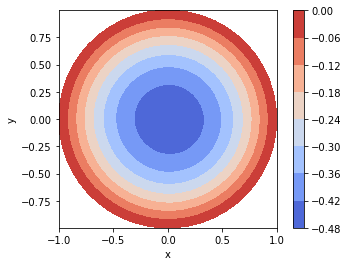

In [13]:
theta = np.linspace(0, 2*np.pi, NR+1)
X, Y = np.meshgrid(r, theta, sparse =False, indexing = 'ij')
a, b = X*np.cos(Y), X*np.sin(Y)

#plot hasil
plt.contourf(a, b, -1*psi, cmap = cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()